<a href="https://colab.research.google.com/github/sejalbahirat/APS-Failure_Detection_Optimization/blob/main/APS_Failure_Detection_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML Project/train.csv')

data = pd.read_csv('/content/drive/MyDrive/ML Project/train.csv', na_values = "na")

In [ ]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [ ]:
data.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [ ]:
# check no. of rows and columns
data.shape

(36188, 171)

In [ ]:
# check the unique values in a class
data['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [ ]:
# define numerical and categorical columns

numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print(f"we have {len(numeric_features)} numrical features : {numeric_features}")
print(f"we have {len(categorical_features)} categorical features : {categorical_features}")

we have 170 numrical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000',

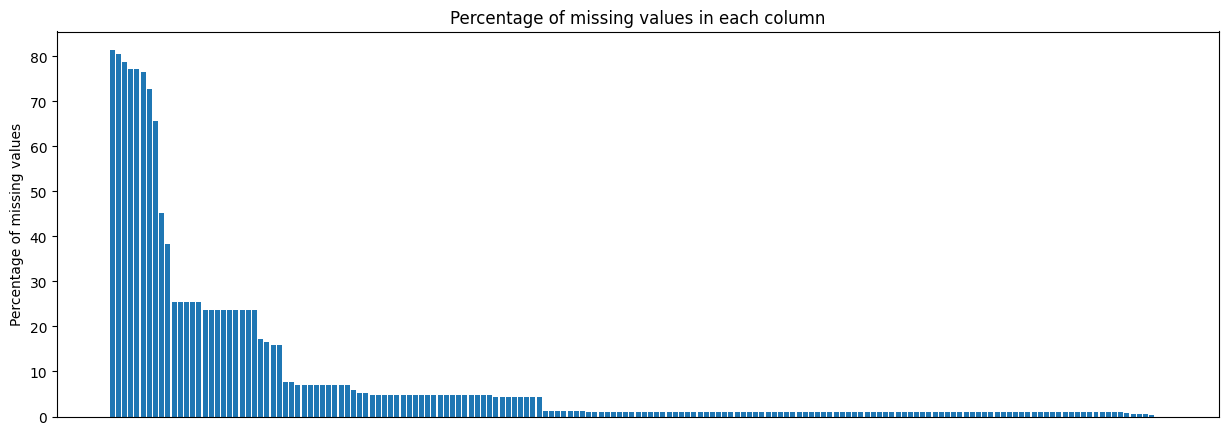

In [ ]:
#check the missing vals if more than 70 try to remove
fig, ax = plt.subplots(figsize=(15, 5))
missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each column')
plt.show()

In [ ]:
# data.isna().mean()

In [ ]:
# dropping cols which has more than 70% of the missing values
dropcols = missing[missing[0] > 70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [ ]:
data.drop(dropcols.index, axis=1, inplace=True)

In [ ]:
data.shape

(36188, 164)

In [ ]:
missing_values_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percentage of the missing data in the entire dataset
print(f"Percentage of the total missing cells in the data : {(total_missing/total_cells)*100}")

Percentage of the total missing cells in the data : 5.37059852747306


In [ ]:
# plot the target variable to understand pattern/data
# sns.countplot(x='class', data=data)
# plt.show()

Positive: 1000, Negative: 35188


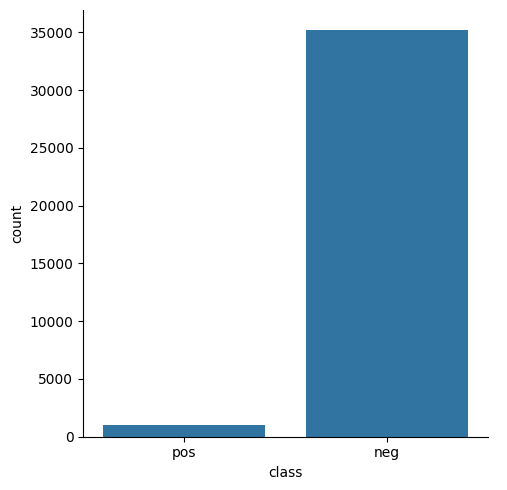

In [ ]:
# plot the target variables to understand the pattern/data

pos = data[data['class']=='pos'].shape[0]
neg = data[data['class']=='neg'].shape[0]
sns.catplot(data=data, x='class', kind="count")
print(f"Positive: {pos}, Negative: {neg}")

In [ ]:
# spliting the data into x and y
X = data.drop('class', axis = 1)
y = data['class']

In [ ]:
# encoding the target variables
y = y.replace({'pos': 1, 'neg': 0})

In [ ]:
# Experiment 1 = KNN Imputer for NULL Values
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(X)

In [ ]:
X1

array([[ 2.48316651e+00,  3.16455696e-02,             nan, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.58106804e+00,  2.92616034e+00,             nan, ...,
         3.42616452e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.43005945e-01,  1.52109705e+00,  2.26470588e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.28301407e-01,  2.24758046e+06, -2.69607843e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00129058e+00,  2.24758046e+06,  8.97058824e-01, ...,
         1.92478692e+02,  0.00000000e+00,  0.00000000e+00],
       [ 1.86901072e-01,  5.75949367e-01,  1.22549020e+00, ...,
         7.82953419e-02,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
# optimal n neighbour
results = []
for s in [1,3,5,7]:
  pipeline = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=s)), ('model', LogisticRegression())])
  scores = cross_val_score(pipeline, X1, y, scoring="accuracy", cv=2, n_jobs = -1)
  results.append(scores)
  print(f"n_neighbors = {s} -> accuracy {np.mean(scores)}")

n_neighbors = 1 -> accuracy 0.7282248259091411
n_neighbors = 3 -> accuracy 0.7350226594451199
n_neighbors = 5 -> accuracy 0.7239416381120813
n_neighbors = 7 -> accuracy 0.6993478501160606


In [ ]:
knn_pipeline = Pipeline(steps = [("impute", KNNImputer(n_neighbors=3)),
                                 ('Robust_scalar', RobustScaler())
                                ])

In [ ]:
X_knn = knn_pipeline.fit_transform(X)

In [ ]:
# balancing the data

from imblearn.combine import SMOTETomek
X_knn = knn_pipeline.fit_transform(X)
smt = SMOTETomek(random_state=101, sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_knn, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
# intialize deafult model in a dict

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "svm" : SVC(),
    "xgb" : XGBClassifier(),
    "boost" : AdaBoostClassifier()
    }

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# create a funnction that will evaluate models and return a report
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
def evalute_clf(true, predicted):

  acc = accuracy_score(true, predicted) # calculate accuracy
  f1 = f1_score(true, predicted) # calculate f1
  precision = precision_score(true, predicted) # calculate precision
  recall = recall_score(true, predicted) # calculate recall
  roc_auc = roc_auc_score(true, predicted) # calculate roc auc

  return acc, f1, precision, recall, roc_auc

In [ ]:
# function to cal the cost of the models
def total_cost(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  cost = 100*fp + 500*fn
  return cost


In [ ]:
# create a funnction that will evaluate models and return a report
def evalute_models(X, y, models):

  # seperate dataset into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

  cost_list = []
  models_list = []

  for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance
    model_train_acc, model_train_f1, model_train_pre, model_train_recall, model_train_curve = evalute_clf(y_train, y_train_pred)
    train_cost = total_cost(y_train, y_train_pred)

    # test set performance
    model_test_acc, model_test_f1, model_test_pre, model_test_recall, model_test_curve = evalute_clf(y_test, y_test_pred)
    test_cost = total_cost(y_test, y_test_pred)

    print('=+'*50)
    print(list(models.values())[i])
    models_list.append(list(models.values())[i])

    print("model performance training set")
    print(f"Accuracy {model_train_acc}")
    print(f"f1 score {model_train_f1}")
    print(f"precision {model_train_pre}")
    print(f"recall {model_train_recall}")
    print(f"roc auc {model_train_curve}")
    print(f"total cost {train_cost}")

    print("-"*50)

    print("model performance test set")
    print(f"Accuracy {model_test_acc}")
    print(f"f1 score {model_test_f1}")
    print(f"precision {model_test_pre}")
    print(f"recall {model_test_recall}")
    print(f"roc auc {model_test_curve}")
    print(f"total cost {test_cost}")
    print('\n')

    cost_list.append(test_cost)

  report = pd.DataFrame(list(zip(models_list, cost_list)), columns = ["model Name", "cost"]).sort_values(by=["cost"])

  return report


In [ ]:
report_knn = evalute_models(X_res, y_res, models)

=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
RandomForestClassifier()
model performance training set
Accuracy 1.0
f1 score 1.0
precision 1.0
recall 1.0
roc auc 1.0
total cost 0
--------------------------------------------------
model performance test set
Accuracy 0.9913743940690048
f1 score 0.9914421104745739
precision 0.9876003945329013
recall 0.9953138312979267
roc auc 0.991358604741434
total cost 25300


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
DecisionTreeClassifier()
model performance training set
Accuracy 1.0
f1 score 1.0
precision 1.0
recall 1.0
roc auc 1.0
total cost 0
--------------------------------------------------
model performance test set
Accuracy 0.9868120901055033
f1 score 0.9869137723703756
precision 0.9832276250880903
recall 0.9906276625958534
roc auc 0.9867967972297905
total cost 44900


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

Task Experiment 1 - Knn imputer - done

Experiment 2 - median imputer

Experiment 3 - mean imputer

Experiment 4 - constant imputer - 0

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
# experiment 3 -  mean imputer

mean_pipeline = Pipeline(steps = [("impute", SimpleImputer(strategy="mean")),
                                 ('Robust_scalar', RobustScaler())
                                ])

X_mean = mean_pipeline.fit_transform(X)

smt = SMOTETomek(random_state=101, sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_mean, y)

report_mean = evalute_models(X_res, y_res, models)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
RandomForestClassifier()
model performance training set
Accuracy 1.0
f1 score 1.0
precision 1.0
recall 1.0
roc auc 1.0
total cost 0
--------------------------------------------------
model performance test set
Accuracy 0.9923049519059494
f1 score 0.9923523580229429
precision 0.987040428229328
recall 0.9977217713227965
roc auc 0.9923007031171883
total cost 17200


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
DecisionTreeClassifier()
model performance training set
Accuracy 1.0
f1 score 1.0
precision 1.0
recall 1.0
roc auc 1.0
total cost 0
--------------------------------------------------
model performance test set
Accuracy 0.9858211613822586
f1 score 0.9859055173879169
precision 0.9808342728297632
recall 0.9910294745835113
roc auc 0.9858170761394454
total cost 45100


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

In [ ]:
report_mean

,model Name,cost
3,"XGBClassifier(base_score=None, booster=None, c...",8800
0,"(DecisionTreeClassifier(max_features='sqrt', r...",17200
1,DecisionTreeClassifier(),45100
4,"(DecisionTreeClassifier(max_depth=1, random_st...",116800
2,SVC(),938300


In [ ]:
# experiment 2 -  median imputer

median_pipeline = Pipeline(steps = [("impute", SimpleImputer(strategy="median")),
                                 ('Robust_scalar', RobustScaler())
                                ])

X_median = mean_pipeline.fit_transform(X)

smt = SMOTETomek(random_state=101, sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_median, y)

report_median = evalute_models(X_res, y_res, models)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
RandomForestClassifier()
model performance training set
Accuracy 1.0
f1 score 1.0
precision 1.0
recall 1.0
roc auc 1.0
total cost 0
--------------------------------------------------
model performance test set
Accuracy 0.9925187032418953
f1 score 0.9925663716814159
precision 0.9870459025626585
recall 0.9981489391997722
roc auc 0.9925142870556761
total cost 15700


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
DecisionTreeClassifier()
model performance training set
Accuracy 1.0
f1 score 1.0
precision 1.0
recall 1.0
roc auc 1.0
total cost 0
--------------------------------------------------
model performance test set
Accuracy 0.9846811542572141
f1 score 0.9847701352978677
precision 0.9798421201014942
recall 0.9897479709525844
roc auc 0.984677179999966
total cost 50300


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

In [ ]:
 # experiment 4 -  constant imputer

constant_pipeline = Pipeline(steps = [("impute", SimpleImputer(strategy="constant", fill_value=0)),
                                 ('Robust_scalar', RobustScaler())
                                ])

X_constant = mean_pipeline.fit_transform(X)

smt = SMOTETomek(random_state=101, sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_constant, y)

report_constant = evalute_models(X_res, y_res, models)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
RandomForestClassifier()
model performance training set
Accuracy 1.0
f1 score 1.0
precision 1.0
recall 1.0
roc auc 1.0
total cost 0
--------------------------------------------------
model performance test set
Accuracy 0.99244745279658
f1 score 0.9924929178470254
precision 0.9873185853177399
recall 0.9977217713227965
roc auc 0.9924433157811929
total cost 17000


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
DecisionTreeClassifier()
model performance training set
Accuracy 1.0
f1 score 1.0
precision 1.0
recall 1.0
roc auc 1.0
total cost 0
--------------------------------------------------
model performance test set
Accuracy 0.9846811542572141
f1 score 0.9847658187486714
precision 0.9801128349788435
recall 0.9894631923679339
roc auc 0.9846774033716451
total cost 51100


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

In [ ]:
# experiment 5 - PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline(steps = [("impute", SimpleImputer(strategy="median")),
                                 ('Robust_scalar', RobustScaler())
                                ])

X_pca = pca_pipeline.fit_transform(X)

In [ ]:
var_ratio = {}
for n in range(2,150):
  pc = PCA(n_components = n)
  df_pca = pc.fit(X_pca)
  var_ratio[n] = sum(df_pca.explained_variance_ratio_)

<Axes: >

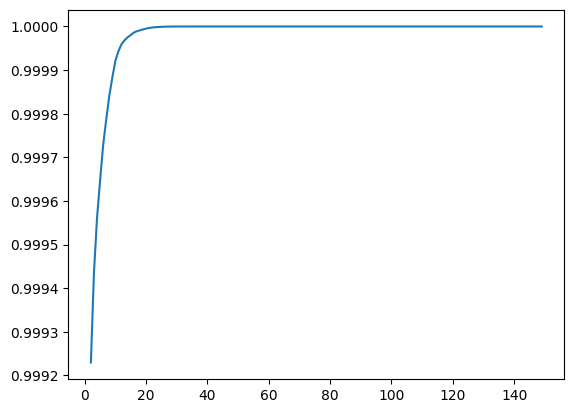

In [ ]:
pd.Series(var_ratio).plot()

In [ ]:
!pip install kneed

<Figure size 600x600 with 0 Axes>

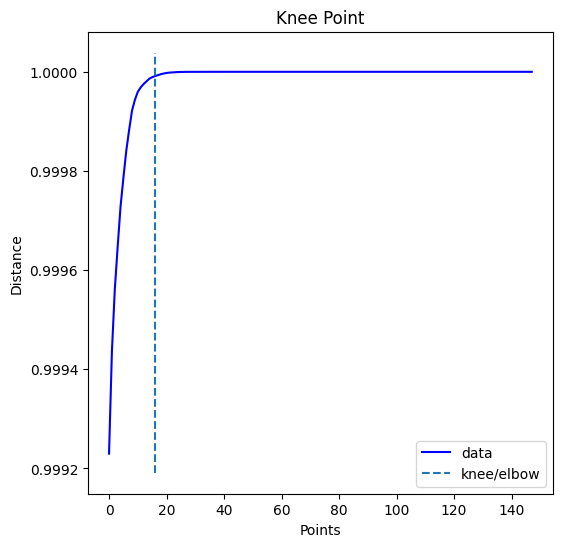

knee locator k = 18


In [ ]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
components = list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, curve="concave", interp_method='polynomial')


fig = plt.figure(figsize=(6,6))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k = components[knee.knee]
print(f"knee locator k = {k}")

In [ ]:
# reducing the dimension of the data

pca_final = PCA(n_components=18)

reduced = pca_final.fit_transform(X_pca)

In [ ]:
reduced.shape

(36188, 18)

In [ ]:
smt = SMOTETomek(random_state=101, sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(reduced, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
# training all models

report_pca = evalute_models(X_res, y_res, models)

=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
RandomForestClassifier()
model performance training set
Accuracy 0.9994087293055257
f1 score 0.9994072530670164
precision 0.9998921755382237
recall 0.9989228007181329
roc auc 0.9994077561276095
total cost 15300
--------------------------------------------------
model performance test set
Accuracy 0.983373942955425
f1 score 0.9835996041283757
precision 0.9780683256010122
recall 0.9891938006540595
roc auc 0.9833268526460588
total cost 53600


=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
DecisionTreeClassifier()
model performance training set
Accuracy 0.9994087293055257
f1 score 0.9994072530670164
precision 0.9998921755382237
recall 0.9989228007181329
roc auc 0.9994077561276095
total cost 15300
--------------------------------------------------
model performance test set
Accuracy 0.9725526730686541
f1 score 0.972915635386465
precision

In [ ]:
report_pca

,model Name,cost
0,"(DecisionTreeClassifier(max_features='sqrt', r...",53600
3,"XGBClassifier(base_score=None, booster=None, c...",80100
1,DecisionTreeClassifier(),99900
4,"(DecisionTreeClassifier(max_depth=1, random_st...",342900
2,SVC(),1622800


In [ ]:
report_mean

,model Name,cost
3,"XGBClassifier(base_score=None, booster=None, c...",8800
0,"(DecisionTreeClassifier(max_features='sqrt', r...",17200
1,DecisionTreeClassifier(),45100
4,"(DecisionTreeClassifier(max_depth=1, random_st...",116800
2,SVC(),938300


In [ ]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["XGBClassifier","Simple Imputer-Constant","2950"])
pt.add_row(["XGBClassifier","Knn-Imputer","4460"])
pt.add_row(["XGBClassifier","Simple Imputer-Mean","4950"])
pt.add_row(["CatBoostClassifier","Median","5760"])
pt.add_row(["Random Forest","PCA","34150"])
print(pt)

+--------------------+-------------------------+------------+
|       Model        |    Imputation_method    | Total_cost |
+--------------------+-------------------------+------------+
|   XGBClassifier    | Simple Imputer-Constant |    2950    |
|   XGBClassifier    |       Knn-Imputer       |    4460    |
|   XGBClassifier    |   Simple Imputer-Mean   |    4950    |
| CatBoostClassifier |          Median         |    5760    |
|   Random Forest    |           PCA           |   34150    |
+--------------------+-------------------------+------------+


In [ ]:
# final --> report --> manual checking -> 95% accuracy

# model -> xgboost
# imputer -> constant

# methods

1. constant imputer
2. robust scaler
3. fix imbalance data -> smotetomek
4. xgboost
5. testing accuracy - cost
6. confusion matrix
7. save the model
8. prod